/Users/devengokhale/anaconda3/envs/ss_2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


That took: 5.4s


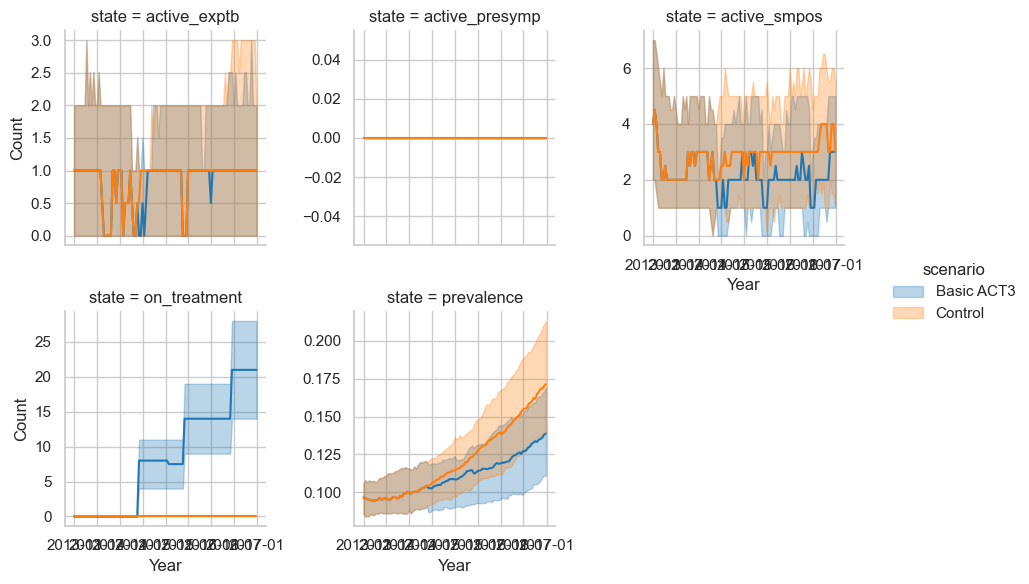

In [1]:
import starsim as ss
import tbsim as mtb
import numpy as np
import pandas as pd
import sciris as sc
import tbsim.config as cfg
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import os

# run act3 here
%run run_act3.py

In [ ]:
#os.getcwdb()

#act3_results = pd.read_csv('../../results/ACT3/ACT3.csv', index_col=0)
#tb_results = pd.read_csv('../../results/ACT3/TB.csv', index_col=0)

b'/Users/devengokhale/Documents/GitHub/tbsim/scripts/ACT3'

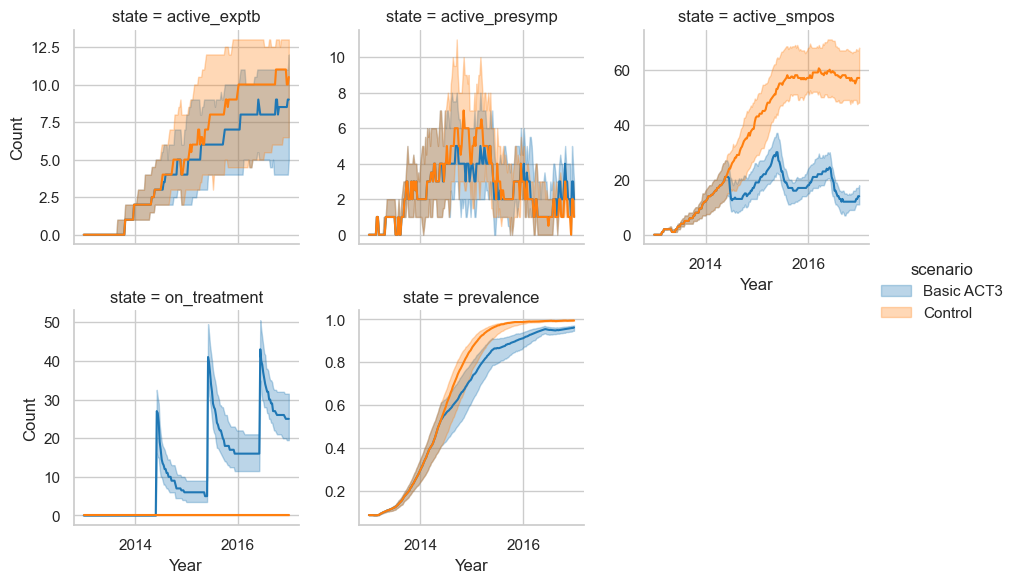

In [3]:
tb_results_agg = (
      tb_results
        .drop(columns='time')
        .melt(id_vars=['time_year', 'scenario', 'rand_seed'], 
                  value_vars=['on_treatment', 'prevalence', 'active_presymp', 'active_smpos', 'active_exptb'], 
                  var_name='state',
                  value_name='count')
        .drop(columns='rand_seed')
        .groupby(['time_year', 'scenario', 'state'])
        .agg(
              median=('count', 'median'), 
              q11=('count', lambda x: np.percentile(x, 11)),
              q89=('count', lambda x: np.percentile(x, 89))
              )
        .reset_index()
        )

# plot the results
sns.set_context("notebook")
sns.set_style("whitegrid")
g = sns.FacetGrid(tb_results_agg, col="state", 
                          margin_titles=True, aspect=1, 
                          sharey=False, hue="scenario", palette="tab10", col_wrap=3)
g.map_dataframe(sns.lineplot, x="time_year", y="median")
g.map_dataframe(plt.fill_between, "time_year", "q11", "q89", alpha=0.3)

g.set_axis_labels("Year", "Count")
g.add_legend()

plt.show()

# g = sns.FacetGrid(tb_results_long, col="state", col_wrap=3, height=4, aspect=1.5, hue="rand_seed", palette="tab10")
# g.map(sns.lineplot, "time_year", "count")
# g.add_legend()

# plt.show()
